<a href="https://colab.research.google.com/github/marianaadmc/TFG-Procesamiento-de-imagenes-de-fluorescencia-FISH-/blob/main/color_sondas_HSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

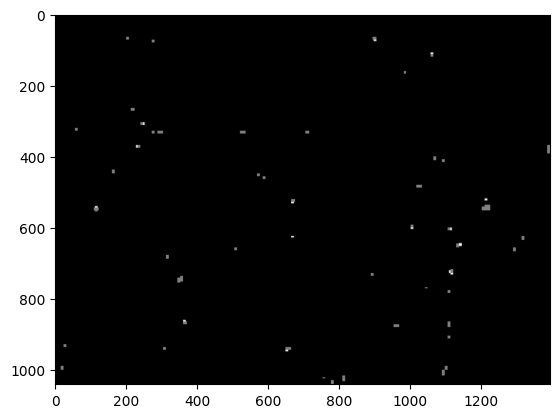

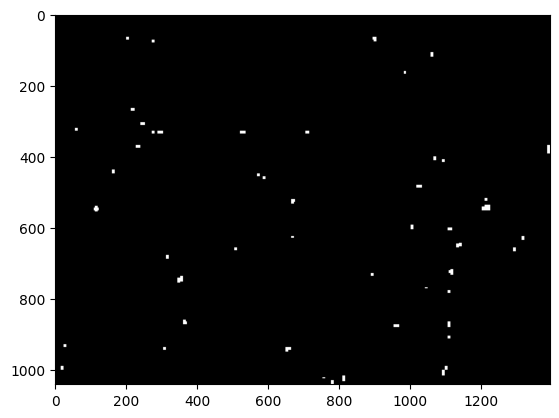

In [1]:
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.colors as color
from skimage.measure import label, regionprops
import numpy as np
sondas = io.imread('sondas_2949_bin_70grid.jpg')

plt.imshow(sondas, cmap = 'gray')
plt.show()

for x in range(0, sondas.shape[0]):
  for y in range(0, sondas.shape[1]):
    if sondas[x][y] != 0:
      sondas[x][y] = 1

plt.imshow(sondas, cmap = 'gray')
plt.show()

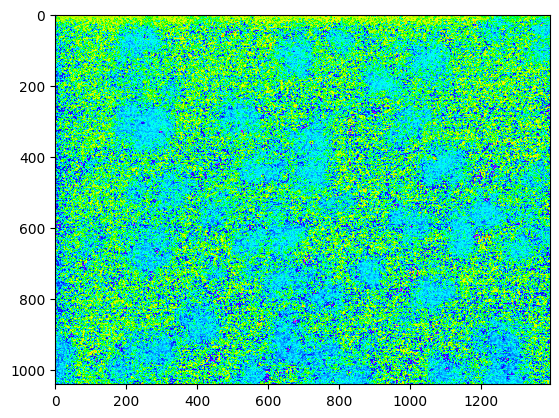

In [2]:
fish_2472 = io.imread("image2472.jpg")
fish_2949 = io.imread("image2949.jpg")
fish_0161 = io.imread(fname="image0161.jpg")

hsv = color.rgb_to_hsv(fish_2949)

canal_h = hsv[:,:,0]

plt.imshow(canal_h, cmap='hsv')

In [3]:
label_image = label(sondas)
regions = regionprops(label_image)
props = regionprops(label_image)

In [4]:
masc_sondas_rojas = np.zeros(sondas.shape)
masc_sondas_verdes = np.zeros(sondas.shape)
for prop in props:
  coords = prop.centroid
  if str(canal_h[int(coords[0])][int(coords[1])])[:3] == '0.0' or str(canal_h[int(coords[0])][int(coords[1])])[:3] == '0.9':
    for x in range(prop.bbox[0], prop.bbox[2]):
      for y in range(prop.bbox[1], prop.bbox[3]):
        if sondas[x][y] == 1:
          masc_sondas_rojas[x][y] = 1
  else:
    for x in range(prop.bbox[0], prop.bbox[2]):
      for y in range(prop.bbox[1], prop.bbox[3]):
        if sondas[x][y] == 1:
          masc_sondas_verdes[x][y] = 1

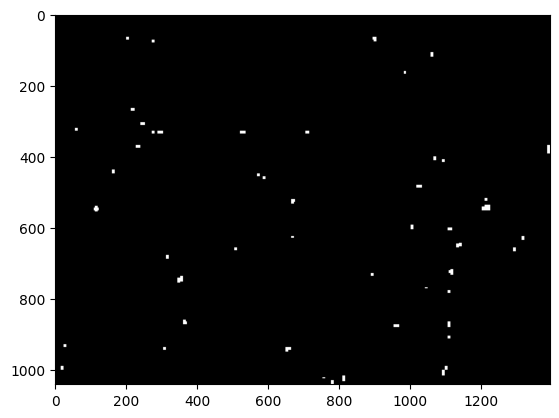

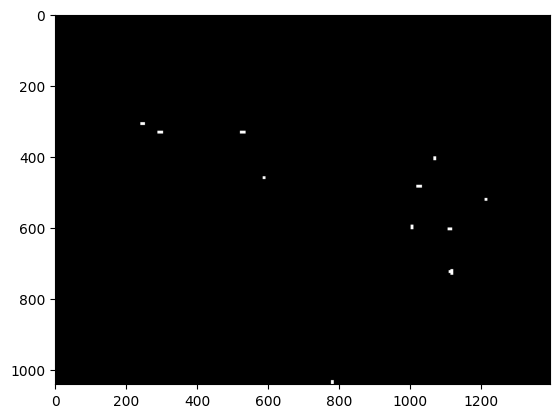

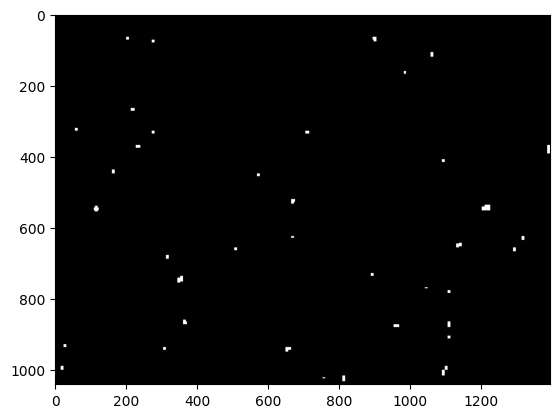

In [5]:
plt.imshow(sondas, cmap = 'gray')
plt.show()
plt.imshow(masc_sondas_rojas, cmap = 'gray')
plt.show()
plt.imshow(masc_sondas_verdes, cmap = 'gray')
plt.show()

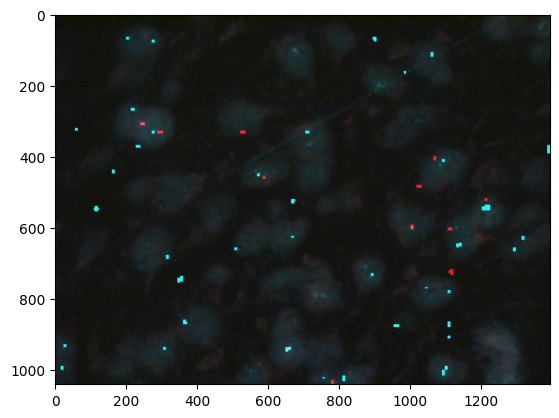

In [6]:
for x in range(0, fish_2949.shape[0]):
  for y in range(0, fish_2949.shape[1]):
    if masc_sondas_rojas[x][y] != 0:
      fish_2949[x][y][0] = 255
    elif masc_sondas_verdes[x][y] != 0:
      fish_2949[x][y][1] = 255
      fish_2949[x][y][2] = 255
plt.imshow(fish_2949)
plt.show()

In [ ]:
image = Image.fromarray(masc_sondas_verdes.astype(np.uint8))
image.save('masc_sondas_verdes0161_grid70_2.jpg')